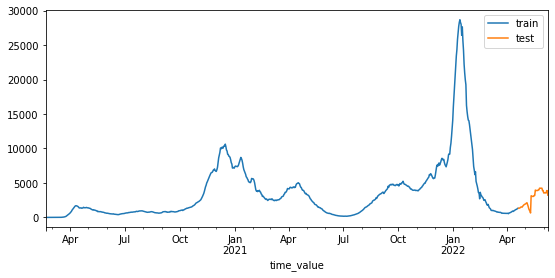

In [9]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

data = pd.read_csv("covid_pa_confirmed_data_7d.csv")
data['time_value'] = pd.to_datetime(data['time_value'], format='%Y-%m-%d')

data = data.set_index("time_value")
data = data.asfreq('D')
data = data.sort_index()
data

# Split train-test
# ==============================================================================
steps = 50
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['value'].plot(ax=ax, label='train')
data_test['value'].plot(ax=ax, label='test')
ax.legend()

In [10]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregMultiOutput(
                    regressor = Ridge(),
                    steps     = steps,
                    lags      = 15
                )

forecaster.fit(y=data_train['value'])
forecaster

# Predict
# ==============================================================================
predictions = forecaster.predict(steps=steps)
# predictions_train = forecaster.predict(data=data_train['value'])

TypeError: predict() got an unexpected keyword argument 'data'

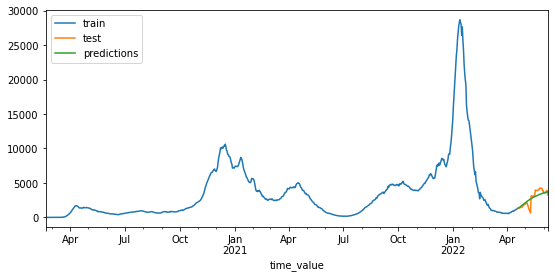

In [ ]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['value'].plot(ax=ax, label='train')
data_test['value'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
#  Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = Ridge(),
                lags      = 15
             )
forecaster.fit(y=data_train['value'])
# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = steps,
                    interval = [5, 95],
                    n_boot   = 500
              )

predictions.head(4)


,pred,lower_bound,upper_bound
2022-04-20,1382.850414,1096.161526,1625.796063
2022-04-21,1424.833819,906.170277,1873.487295
2022-04-22,1462.958664,680.694742,2116.666283
2022-04-23,1518.614539,411.166723,2427.188737


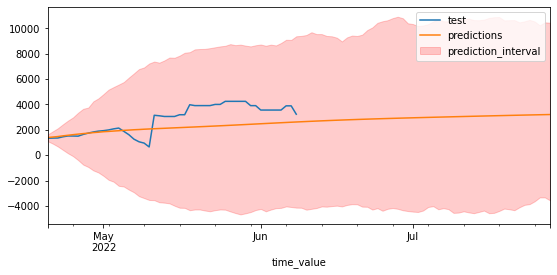

In [ ]:
# Plot predictions and interval
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_test['value'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predictions')
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color = 'red',
    alpha = 0.2,
    label = 'prediction_interval'
)
ax.legend(loc='upper right')

In [ ]:
forecaster.get_feature_importance()

,feature,importance
0,lag_1,1.270295
1,lag_2,0.146447
2,lag_3,-0.372850
3,lag_4,0.033884
4,lag_5,0.059414
5,lag_6,-0.053435
6,lag_7,-0.531262
7,lag_8,0.622626
8,lag_9,-0.063335
9,lag_10,-0.147915
